In [1]:
## Testing
import numpy as np
from __future__ import division
from keras.models import model_from_json

In [2]:
## Testing
json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()
load_model = model_from_json(loaded_model_json)

In [3]:
## Load weights into new model
load_model.load_weights("model_100epochs.h5")
print("Loaded model from disk")

truey = []
predy = []
x = np.load('modXtest.npy')
y = np.load('modYtest.npy')

yhat = load_model.predict(x)
yh = yhat.tolist()
yt = y.tolist()
count = 0

for i in range(len(y)):
    yy = max(yh[i])
    yyt = max(yt[i])
    predy.append(yh[i].index(yy))
    truey.append(yt[i].index(yyt))
    if(yh[i].index(yy)==yt[i].index(yyt)):
        count+=1
        
acc = (count/len(y))*100

## Saving values for confusion matrix and analysis
np.save('truey',truey)
np.save('predy',predy)
print("Predicted and true label values saved")
print("Accuracy on test set :",acc,"%")

Loaded model from disk
Predicted and true label values saved
Accuracy on test set : 64.55837280579549 %


In [4]:
## Confusion Matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

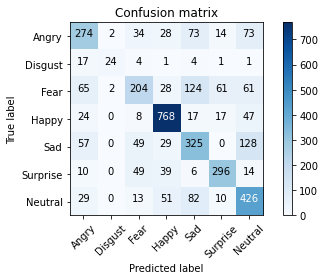

In [5]:
## Confusion Matrix
y_true = np.load('truey.npy')
y_pred = np.load('predy.npy')
cm = confusion_matrix(y_true, y_pred)
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
title = 'Confusion matrix'

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max()/2
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
            horizontalalignment="center",
            color="white" if cm[i,j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()